# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [7]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [8]:
print(df.shape)

(294478, 5)


**c.** The number of unique users in the dataset.

In [9]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [10]:
p_converted = df['converted'].mean()
print("The proportion of users converted is {0:.2%}".format(p_converted))

The proportion of users converted is 11.97%


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [11]:
df.query("group == 'treatment' and landing_page != 'new_page'").shape[0]

1965

**f.** Do any of the rows have missing values?

In [12]:
print(df.info())
# No, There is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query('(group == "control" and landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")').index)

In [14]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [15]:
print('There are {} unique users'.format(df2['user_id'].nunique()))

There are 290584 unique users


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [17]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [18]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [19]:
convert = df2.query('converted == 1')['user_id'].nunique()
p_convert_succRate = convert/df2.shape[0]
print('probability of over all "converted" users success rate is: {0:.2%}'.format(p_convert_succRate))

probability of over all "converted" users success rate is: 11.96%


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
conver_cntr = df2.query('group == "control" and converted == 1')['user_id'].nunique()
control = df2.query('group == "control"')['user_id'].nunique()
p2 = conver_cntr/control
print('probability of over all "control" user while "converted" success rate is: {0:.2%}'.format(p2))

probability of over all "control" user while "converted" success rate is: 12.04%


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
conver_treat = df2.query('group == "treatment" and converted == 1')['user_id'].nunique()
treatment = df2.query('group == "treatment"')['user_id'].nunique()
p3 = conver_treat/treatment
print('probability of over all "treatment" user while "converted" success rate is: {0:.2%}'.format(p3))

probability of over all "treatment" user while "converted" success rate is: 11.88%


In [22]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p3 - p2
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [23]:
new_p = df2.query('landing_page == "new_page"')['user_id'].nunique()
p4 = new_p/df2.shape[0]
print('probability of user when recieved "new_page" is: {0:.2%}'.format(p4))

probability of user when recieved "new_page" is: 50.01%


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>Probability of converted while in control group is 12.04% and Probability of converted while in treatment group is 11.88%.

>Since convertion rate regardless of the group is 11.96% and the probabilities of convertion rate of either group is similar so there is nn evidence that treatment group users lead to more convertions, actually they lead to less convertions than control group users. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>Null: **H0 = (P_new - P_old <= 0)**
>, Alternative: **H1 = (P_new - P_old > 0)**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [24]:
p_new_null = round(df2.query('converted == 1')['user_id'].nunique()/df2.shape[0],4)
print('convertion rate for P-new when null is: {0:.2%}'.format(p_new_null))

convertion rate for P-new when null is: 11.96%


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [25]:
p_old_null = round(df2.query('converted == 1')['user_id'].nunique()/df2.shape[0],4)
print('convertion rate for P-old when null is: {0:.2%}'.format(p_old_null))

convertion rate for P-old when null is: 11.96%


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [26]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

In [28]:
n_new - n_old

36

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [29]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], p=(p_new_null, 1-p_new_null), size = n_new)
new_page_converted

array([1, 1, 1, ..., 0, 1, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [30]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], p=(p_old_null, 1-p_old_null), size = n_old)
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [31]:
new_mean = new_page_converted.mean()
old_mean = old_page_converted.mean()
new_mean - old_mean

-0.0010095455852100477


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [37]:
# Sampling distribution 
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new_null, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old_null, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


Text(0.5,1,'Histogram of difference in proportions of P_new, P_old')

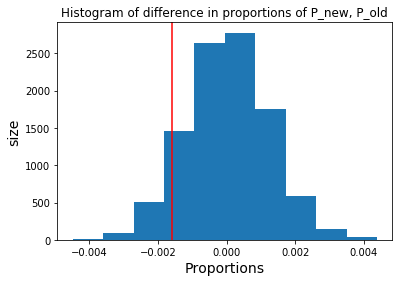

In [38]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(obs_diff, c='red')
plt.xlabel('Proportions', size=14)
plt.ylabel('size', size=14)
plt.title('Histogram of difference in proportions of P_new, P_old')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [39]:
# first, we compute the null_vals
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

Text(0.5,1,'Histogram of difference in proportions with the null hypothesis')

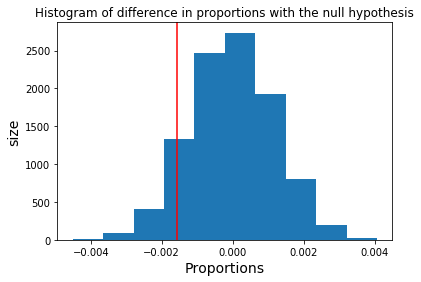

In [40]:
# Then, plot the null distribution and plot line for actual difference observed
plt.hist(null_vals)
plt.axvline(obs_diff, c='red')
plt.xlabel('Proportions', size=14)
plt.ylabel('size', size=14)
plt.title('Histogram of difference in proportions with the null hypothesis')

In [41]:
# Then, the proportion o p_diffs greater than actual difference observed
(null_vals > obs_diff).mean()

0.90980000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>With a type I error rate of 0.05, we have P_old > Alpha. So we failed to reject the null hypothesis. Therefore, the data shows that the old page has higher probability of convertion rate than new page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [42]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].nunique()

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].nunique()

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---



In [43]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count_array = np.array([convert_new, convert_old])
nobs_array = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


>Since Z_score is 1.310 and Z_Alpha is 1.645 because this is one-right-tailed test so Z_score is smaller than Z_Alpha and we failed to reject the null hypothesis. Therefore, the convertion rate stays the same as the findings in parts J and K and that is the convertion rate of old page users has higher or equal convertion rate than the new page users.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression, because I have to compute categorical variables**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [44]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [45]:
# Creating dummy variable for landing page 
df2 = df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [46]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-19 22:23 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>P-value associated with ab_page = 0.189, and it differs because of the sample size changing and the magnitude effect.

>**Null: there's no difference between the treatment and the control groups**, 

>**Alternative: there's difference between the treatment and the control groups**

>They compare to Part II in that they assume the alternative(new_page) to be true unless the null(old_page) proves to be better.

>**(Part II vs Part III)** Part II is one-sided and Part III is two-sided due to the null and alternative hypothesis in both of them.

>I have p_value of 0.189 and that is significally greater that type I error Alpha 5% so I fail to reject the Null hypothesis.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Other **factors** to consider is (timestamp) we can consider the dependency of convertion rate of the day whether (weekend/weekday) and the time of the day whether (morning/afternoon/evening).

> **Advantages** of considering other factors is it helps in making the prediction result better.

> **Disadvantages** of considering other factors is it makes the regression model more complex and then we need to add higher order variables and it results in Multicollinearity.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [48]:
# Read the countries.csv
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [49]:
# Join with the df2 dataframe
df_merged = df2.merge(country, on='user_id')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US


In [50]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

In [51]:
df_merged = df_merged.drop('CA', axis=1)

In [52]:
#Checking period of testing
df_merged.timestamp.max(),df_merged.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [53]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,US,0,1


In [54]:
df_merged['intercept'] = 1

In [55]:
lg = sm.Logit(df_merged['converted'], df_merged[['intercept', 'new_page', 'UK', 'US']])
res = lg.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-19 22:23 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [64]:
print('for every UK user increase, the chance of converted is {0:.1%} higher than CA holding all other variables constant'.format(np.exp(0.0506)-1))
print('for every US user increace, the chance of converted is {0:.1%} higher than CA holding all other variables constant'.format(np.exp(0.0408)-1))
print('for every unit for new_page decrease, convert will have {0:.1%} chance of happening holding all other valiables constant'.format(1/np.exp(-0.0149)-1))

for every UK user increase, the chance of converted is 5.2% higher than CA holding all other variables constant
for every US user increace, the chance of converted is 4.2% higher than CA holding all other variables constant
for every unit for new_page decrease, convert will have 1.5% chance of happening holding all other valiables constant


> Pvalue of new_page is 0.1912 and if we compare it to Type I error 0.05 we found that it is bigger so we **fail to reject the null hypothesis** that there is no difference between control and treatment groups.

>UK and US users has more chance of convertion to new page than CA to new page.


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [57]:
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['US']

In [58]:
# Fit your model, and summarize the results
lg2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'new_page', 'UK', 'US', 'ab_UK', 'ab_US']])
res2 = lg2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-19 22:23 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
new_page      -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [68]:
print('for every unit for new_page decrease, convert will have {0:.1%} chance of happening holding all other valiables constant.'.format(1/np.exp(-0.0674)-1))

for every unit for new_page decrease, convert will have 7.0% chance of happening holding all other valiables constant.


In [72]:
np.exp(res2.params)

intercept    0.134794
new_page     0.934776
UK           1.011854
US           1.017682
ab_UK        1.081428
ab_US        1.048001
dtype: float64

>**First:** From this regression, we found that p value for new page is still 0.1947 and if we compare it to Type I error 0.05 we found that it is bigger so we **fail to reject the null hypothesis** that there is no difference between control and treatment groups.

>Also, p value of ab_UK and ab_US is 0.1681 and 0.3833 respectively and p value of UK and US is significantly large compared to p value of intercept, So these values are not statistically significant. Therefore, a user's country is not significant on the convertion rate of a user. 

>For every unit increace in ab_UK (new page users), there is 1.08 chance of more convertion rate than CA new page users, holding all other variables constant.

>For every unit increace in ab_US (new page users), there is 1.04 chance of more convertion rate than CA new page users, holding all other variables constant.

>For every unit increace in UK (new page users), there is 1.01 chance of more convertion rate than CA new page users, holding all other variables constant.

>For every unit increace in US (new page users), there is 1.02 chance of more convertion rate than CA new page users, holding all other variables constant.

>**Second: Statistical Reasoning** 
>1-We should stay with the old page because the result of all our A/B test suggests that.
>>2-A users country doesn't have the statistical significance of changing the convertion rate of a user to new page.

>**Third: Practicel Reasoning** 
>1-We should run the tests for a longer period of time than 22 days to ensure that our judjement is correct because with larger scale of time we might see some changes in the statistics and we may find that we should reject the null because the result of the A/B test is close and there isn't great difference between the two pages so we definitely need to run the tests for longer period of time at least 3 months.
>>2-New page might be better but there is a chance that old users is comfortable with the old page layout and they didn't have enough time to memorize and be familliar with new page so we need to increase the period to see if the new page statistics got better.
>>>3-Old page might be actually better and the new users are encouraging the change in the layout without thinking through or without admitting that the old page is better.
>>>>4-Users age may be useful to know in our dataset to test if the elder users are the ones whom choosing the old page layout or whether the young users choosing the new page layout and that would be insightful because then we would know that the old page statistics is better just because of the elder users whom not confortable with the change in the layout so we would know how the statistics came from.
>>>>>5-The convertion rate of a user and the country they live in may be not relevant because of the percentages are too low and close to each other.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0